## 나이브 베이즈 분류기

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", 
                 sep='\t', header=None, names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
# 2. 레이블을 숫자로 변환
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. 훈련/테스트 셋 분리
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

In [4]:
# 4. 텍스트 데이터를 숫자로 벡터화 (BoW 방식)
# 문장마다 해당 단어가 몇 번 등장했는지 기록.
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train_vec.shape

(4457, 7702)

In [5]:
X_train_vec[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
# 5. 나이브 베이즈 모델 학습
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [7]:
# 6. 예측 및 평가
y_pred = model.predict(X_test_vec)

print("정확도:", accuracy_score(y_test, y_pred))

정확도: 0.9919282511210762


## 마르코프 체인으로 그 해 승객 인원 수 예측하기

* 1월의 승객 수를 입력 받았을 때, 나머지 11개월의 승객 수를 예측해 보자.

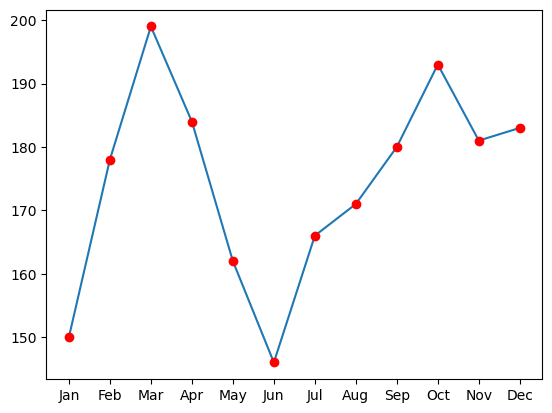

In [61]:
import seaborn as sns
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import random

# 데이터 로드
df = sns.load_dataset("flights")
passengers = df['passengers'].tolist()

# 마르코프 체인 생성 (month → 다음 month)
chain = defaultdict(list)
for i in range(len(passengers) - 1):
    chain[passengers[i]].append(passengers[i + 1])

# 예측
def generate_passenger_sequence(start=150, steps=11):
    state = start
    result = [state]
    for _ in range(steps):
        while not chain.get(state):
            state -= 1
        state = random.choice(chain.get(state))
        result.append(state)
    return result

result = generate_passenger_sequence(start=150)
plt.plot(result)
plt.plot(result, 'ro')
plt.xticks(range(12), list(df['month'].unique()))
plt.show()

## 마르코프 텍스트 생성기

In [23]:
import pandas as pd
import random
import re
from collections import defaultdict

# 1. 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", 
                 sep='\t', header=None, names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# 2. 전처리: 메시지를 단어로 토큰화
sentences = df['message'].str.lower().tolist()
# 공백을 사이에 두고, 특수기호는 모두 제거.
tokenized_sentences = [re.findall(r'\b\w+\b', s) for s in sentences]

tokenized_sentences[0]

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [31]:
# 3. 마르코프 체인 테이블 생성
chain = defaultdict(list)
for tokens in tokenized_sentences:
    for i in range(len(tokens) - 1):
        chain[tokens[i]].append(tokens[i+1])

In [33]:
chain['go']

['until',
 'str',
 'there',
 'home',
 'i',
 'ahead',
 'to',
 'to',
 'down',
 '4',
 'ahead',
 'bathe',
 'txt',
 'to',
 'sim',
 'gurl',
 'out',
 '4',
 'watch',
 'to',
 'yan',
 'cine',
 'mrt',
 'make',
 'my',
 'for',
 'get',
 'to',
 'jazz',
 'meet',
 'to',
 'temple',
 '2',
 'ah',
 'find',
 'lido',
 'tis',
 'tell',
 'figure',
 'to',
 'buy',
 'careful',
 'to',
 'sup',
 'to',
 'temple',
 'for',
 'c',
 'get',
 'on',
 'for',
 'str',
 'change',
 'to',
 'then',
 'then',
 '2',
 'to',
 'n',
 '2',
 'away',
 'to',
 'and',
 'shopping',
 'for',
 'out',
 'to',
 'txt',
 'another',
 '4',
 'aust',
 '4',
 'for',
 'yan',
 '4',
 'earlier',
 'over',
 'to',
 'out',
 'on',
 'to',
 'to',
 'pick',
 'now',
 'on',
 'out',
 'out',
 'ok',
 'nus',
 'sleep',
 'and',
 'away',
 'tonight',
 'txt',
 'and',
 'out',
 'buy',
 'fr',
 'elsewhere',
 'out',
 'jazz',
 'to',
 'out',
 'to',
 'at',
 'n',
 'out',
 'aiya',
 'to',
 'into',
 'the',
 'to',
 'cafe',
 'nydc',
 'ur',
 'for',
 'accordin',
 'if',
 'back',
 'to',
 'to',
 'shop'

In [39]:
# 4. 문장 생성 함수
def generate_sms(start_word='hi', max_len=15):
    word = start_word
    sentence = [word]
    for _ in range(max_len - 1):
        next_words = chain.get(word)
        # 다음 단어가 존재하지 않으면 끝.
        if not next_words:
            break
        # 해당 단어 다음에 나올 수 있는 단어들 중 랜덤으로 하나 선정.
        word = random.choice(next_words)
        sentence.append(word)
    return ' '.join(sentence)

# 5. 예시 출력
print("📨 자동 생성된 문자:", generate_sms("you"))

📨 자동 생성된 문자: you being good morning princess i have e afternoon my heart is called someone asked


In [40]:
# 2. 전처리: 메시지를 단어로 토큰화
sentences = df[df['label']=='ham']['message'].str.lower().tolist()
# 공백을 사이에 두고, 특수기호는 모두 제거.
tokenized_sentences = [re.findall(r'\b\w+\b', s) for s in sentences]

# 3. 마르코프 체인 테이블 생성
chain = defaultdict(list)
for tokens in tokenized_sentences:
    for i in range(len(tokens) - 1):
        chain[tokens[i]].append(tokens[i+1])

# 4. 문장 생성 함수
def generate_sms(start_word='hi', max_len=15):
    word = start_word
    sentence = [word]
    for _ in range(max_len - 1):
        next_words = chain.get(word)
        # 다음 단어가 존재하지 않으면 끝.
        if not next_words:
            break
        # 해당 단어 다음에 나올 수 있는 단어들 중 랜덤으로 하나 선정.
        word = random.choice(next_words)
        sentence.append(word)
    return ' '.join(sentence)

# 5. 예시 출력
print("📨 자동 생성된 문자:", generate_sms("you"))

📨 자동 생성된 문자: you want you babe teasing kiss to smile knowing all as if when i ll


현재는 딥러닝을 이용해 마르코프 체인 기반이 아닌, 모든 단어를 다 고려하여 다음 단어를 예측하는 식으로 챗봇이 만들어지고 있다.

마르코프 체인 기반 챗봇은 이들의 조상인 셈.